In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_jan = '/mnt/data06/andyxia/data/Jan/Jan_bomb_data.json'
file_feb = '/mnt/data06/andyxia/data/Feb/Feb_bomb_data.json'
file_mar = '/mnt/data06/andyxia/data/Mar/Mar_bomb_data.json'
file_apr = '/mnt/data06/andyxia/data/Apr/Apr_bomb_data.json'
file_may = '/mnt/data06/andyxia/data/May/May_bomb_data.json'
file_jun = '/mnt/data06/andyxia/data/Jun/Jun_bomb_data.json'
file_jul = '/mnt/data06/andyxia/data/Jul/Jul_bomb_data.json'
df1 = pd.read_json(file_jan)
df2 = pd.read_json(file_feb)
df3 = pd.read_json(file_mar)
df4 = pd.read_json(file_apr)
df5 = pd.read_json(file_may)
df6 = pd.read_json(file_jun)
df7 = pd.read_json(file_jul)


In [75]:
def read_df(df):
    data_array=df.to_numpy()
    stat=[]
    for entry in data_array:
        # print(entry[0])
        if entry[0]!='error set':
            # print(isinstance(entry[2],dict))
            for value in entry:
                if isinstance(value,dict):
                    if value['T']['living_players'] is not None:
                        for player in value['T']['living_players']:
                            stat.append(player)
                    if value['T']['dead_players'] is not None:
                        for player in value['T']['dead_players']:
                            player['is_alive']=False
                            player['hp']=0
                            stat.append(player)
                    if value['CT']['living_players'] is not None:
                        for player in value['CT']['living_players']:
                            stat.append(player)
                    if value['CT']['dead_players'] is not None:
                        for player in value['CT']['dead_players']:
                            player['is_alive']=False
                            player['hp']=0
                            stat.append(player)
    # stats=[]
    # for x in stat:
    #     for x1 in x:
    #         stats.append(x1)
    return stat

In [76]:
# data_array
# df
# stat
stats=[]
stats.append(read_df(df1))
stats.append(read_df(df2))
stats.append(read_df(df3))
stats.append(read_df(df4))
stats.append(read_df(df6))

In [97]:
jan=stats[0]
jan_live=[]
jan_dead=[]
for player in jan:
    if player['is_alive']:
        jan_live.append(player)
    else:
        jan_dead.append(player)

df_jan_live=pd.DataFrame(jan_live)
df_jan_dead=pd.DataFrame(jan_dead)
df_jan=pd.DataFrame(jan)

print(df_jan_live.head())


         playerName  is_alive   hp  armor  equipment_value  cash  \
0    1WIN.travis19K      True   67     95             4800  3450   
1     1WIN.glowiing      True   30     85             7050  3200   
2       1WIN.fostar      True   51     83             4200  1900   
3         1WIN.deko      True   71     89             5000    50   
4  NemigaBELCHONOKK      True  100    100             4400  2300   

   cash_spend_this_round  round_damage primary_weapon secondary_weapon  ...  \
0                   4800           200          AK-47         Glock-18  ...   
1                   4800             0            AWP         Glock-18  ...   
2                   4900           100          AK-47         Glock-18  ...   
3                    700             0          AK-47         Glock-18  ...   
4                   1400            82           M4A1            USP-S  ...   

  total_deaths                                  lastKnownPosition   velocityX  \
0            9  [-499.9931945800781

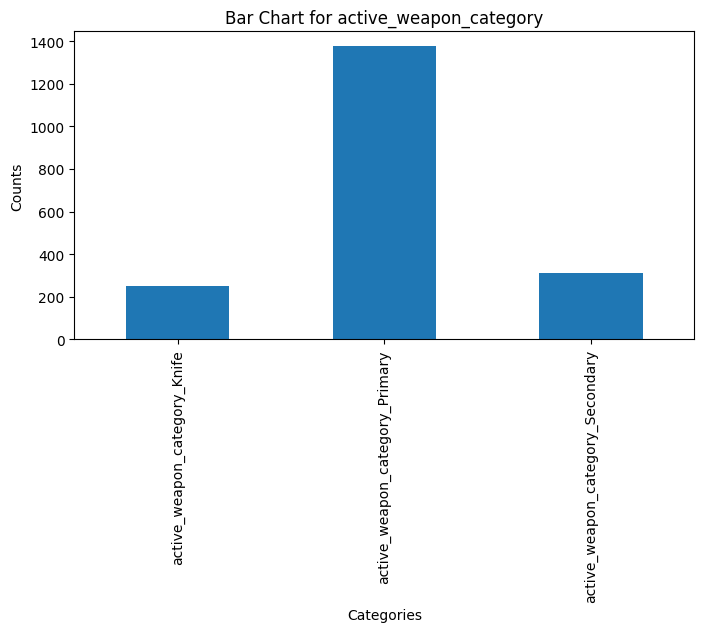

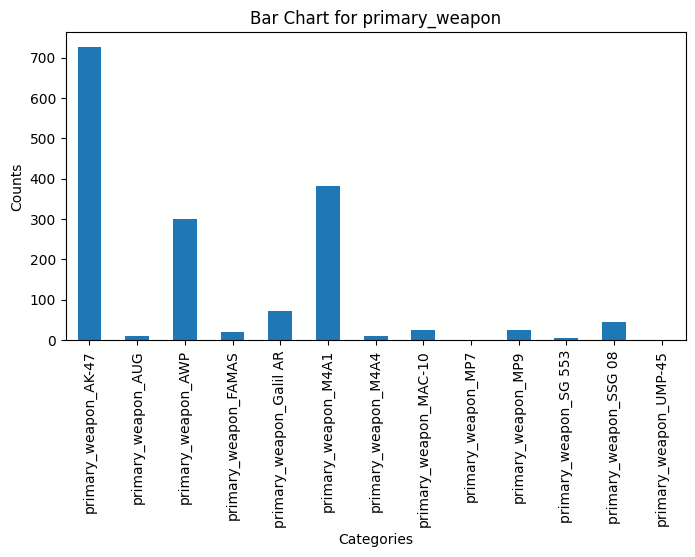

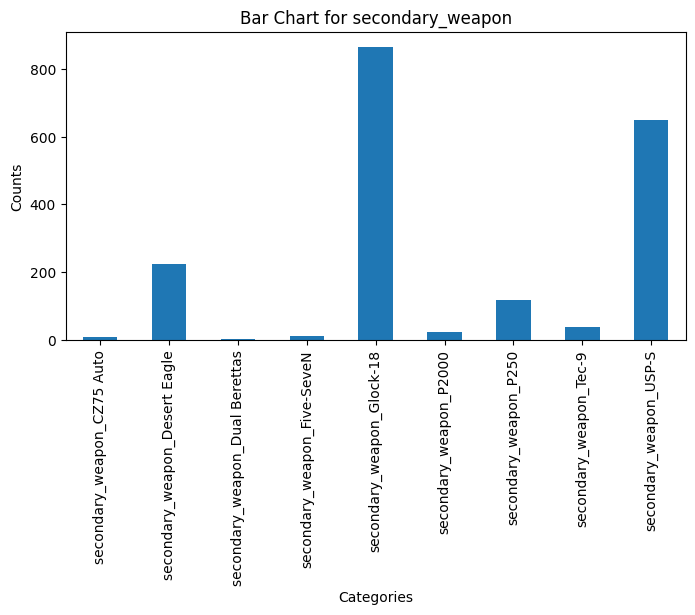

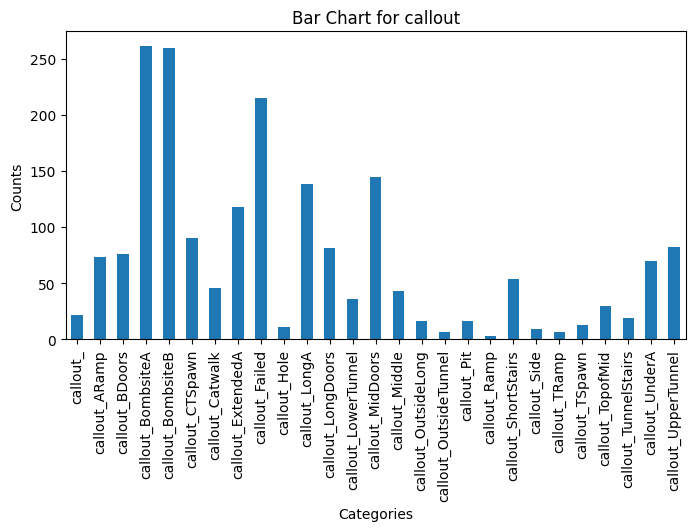

In [78]:
columns_to_encode = ['active_weapon_category', 'primary_weapon', 'secondary_weapon', 'callout']
# print(df1.columns)

encoded_dfs = {}

for column in columns_to_encode:
    encoded_df = pd.get_dummies(df_jan_live[column], prefix=column)
    encoded_dfs[column] = encoded_df
    encoded_sum = encoded_df.sum()
    plt.figure(figsize=(8, 4))
    encoded_sum.plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.ylabel('Counts')
    plt.xlabel('Categories')
    plt.show()

In [79]:

df1=pd.get_dummies(df_jan_live, columns=['active_weapon_category','primary_weapon','secondary_weapon','callout'])
print(df1.head())

         playerName  is_alive   hp  armor  equipment_value  cash  \
0    1WIN.travis19K      True   67     95             4800  3450   
1     1WIN.glowiing      True   30     85             7050  3200   
2       1WIN.fostar      True   51     83             4200  1900   
3         1WIN.deko      True   71     89             5000    50   
4  NemigaBELCHONOKK      True  100    100             4400  2300   

   cash_spend_this_round  round_damage  grenades_left  flashes_left  ...  \
0                   4800           200              0             0  ...   
1                   4800             0              0             0  ...   
2                   4900           100              0             0  ...   
3                    700             0              0             0  ...   
4                   1400            82              0             0  ...   

   callout_Pit  callout_Ramp  callout_ShortStairs  callout_Side  \
0        False         False                False         False   


In [80]:
df1.describe()

,hp,armor,equipment_value,cash,cash_spend_this_round,round_damage,grenades_left,flashes_left,smokes_left,molotovs_left,total_kills,round_kills,total_deaths,velocityX,velocityY,velocityZ,viewX,viewY,average_damage_per_round
count,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
mean,82.640206,86.686598,4420.283505,1963.118557,2748.685567,53.563402,0.084536,0.339175,0.223711,0.087629,17.981959,0.509794,17.003608,-2.895967,-2.621629,-0.536000,190.783149,131.478140,73.581414
std,27.916021,27.334720,1852.527697,2404.975785,1940.038380,68.022928,0.278262,0.597754,0.416838,0.282827,5.880290,0.734058,3.770969,94.088635,91.982203,45.517555,101.229180,166.783352,18.400367
min,1.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,7.000000,-266.728638,-281.378845,-451.131622,0.115356,0.000000,25.083333
25%,72.000000,88.000000,3900.000000,250.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,15.000000,-29.380675,-28.329939,0.000000,100.343628,3.533478,61.269231
50%,100.000000,99.000000,4800.000000,900.000000,2675.000000,15.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,17.000000,0.000000,0.000000,0.000000,203.598633,9.511414,72.933333
75%,100.000000,100.000000,5500.000000,2950.000000,4400.000000,100.000000,0.000000,1.000000,0.000000,0.000000,22.000000,1.000000,20.000000,21.694100,25.468745,0.000000,269.741821,354.357147,84.372257
max,100.000000,100.000000,8250.000000,15000.000000,10650.000000,348.000000,1.000000,2.000000,1.000000,1.000000,36.000000,4.000000,29.000000,277.086670,249.950836,292.618378,359.983521,359.972534,134.210526


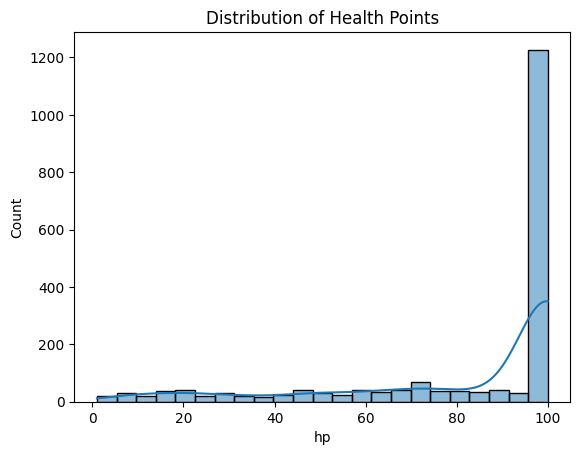

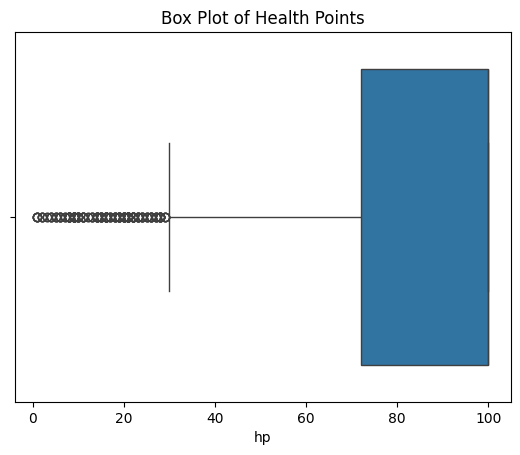

In [81]:
sns.histplot(df1['hp'], kde=True)
plt.title('Distribution of Health Points')
plt.show()

sns.boxplot(x='hp', data=df1)
plt.title('Box Plot of Health Points')
plt.show()

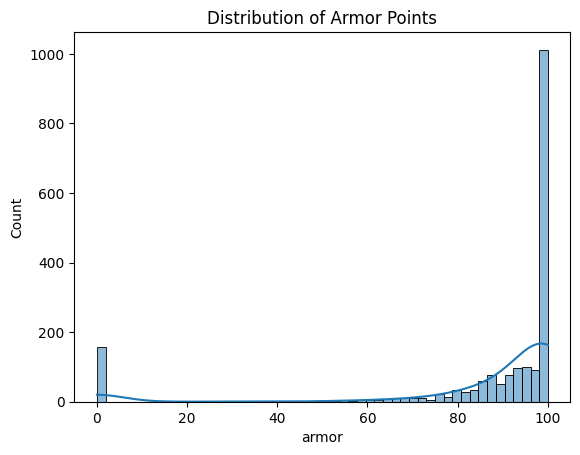

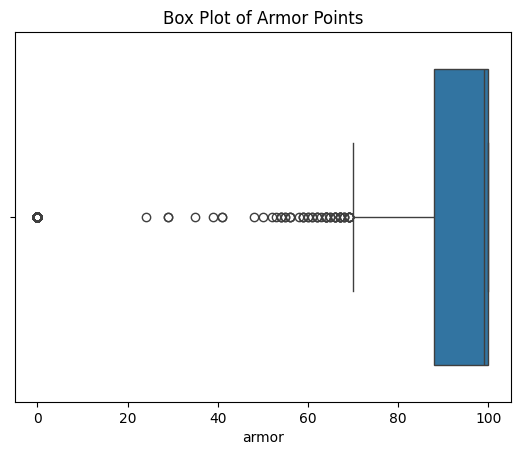

In [82]:
sns.histplot(df1['armor'], kde=True)
plt.title('Distribution of Armor Points')
plt.show()

sns.boxplot(x='armor', data=df1)
plt.title('Box Plot of Armor Points')
plt.show()

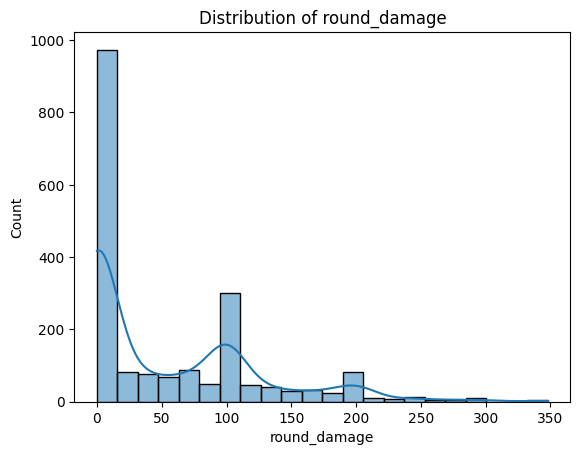

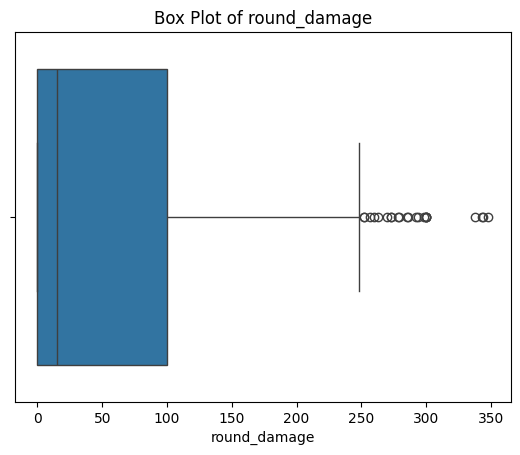

In [83]:
sns.histplot(df1['round_damage'], kde=True)
plt.title('Distribution of round_damage')
plt.show()

sns.boxplot(x='round_damage', data=df1)
plt.title('Box Plot of round_damage')
plt.show()

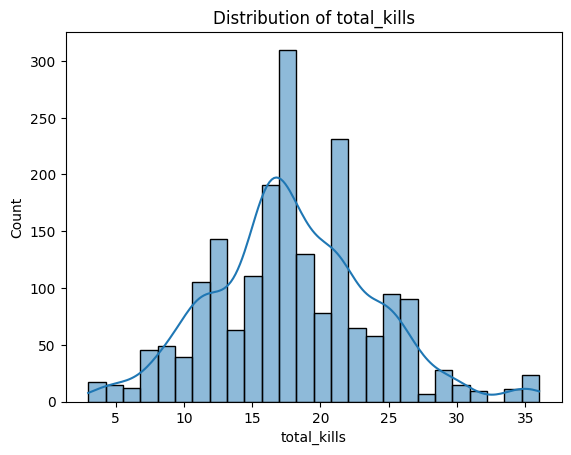

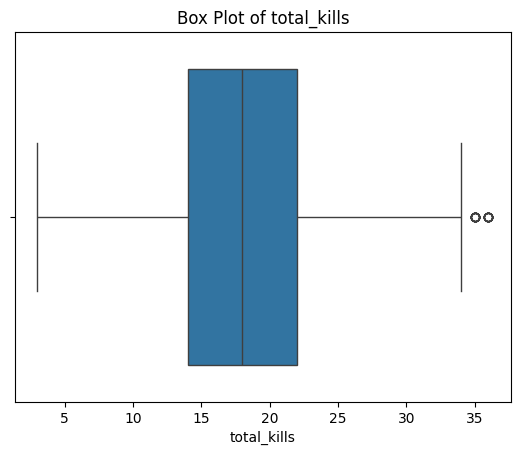

In [84]:
sns.histplot(df1['total_kills'], kde=True)
plt.title('Distribution of total_kills')
plt.show()

sns.boxplot(x='total_kills', data=df1)
plt.title('Box Plot of total_kills')
plt.show()

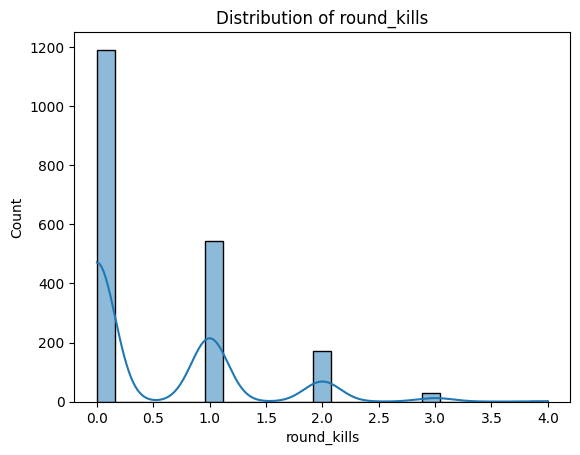

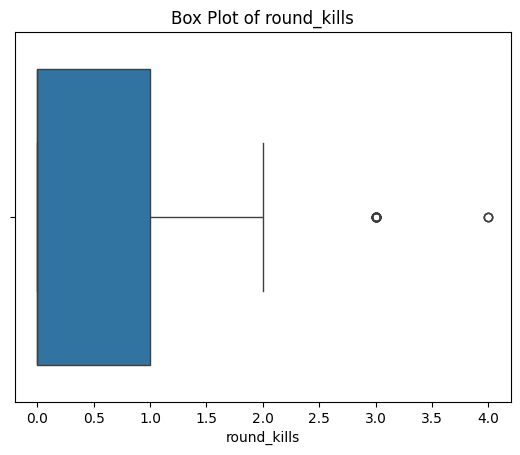

In [85]:
sns.histplot(df1['round_kills'], kde=True)
plt.title('Distribution of round_kills')
plt.show()

sns.boxplot(x='round_kills', data=df1)
plt.title('Box Plot of round_kills')
plt.show()

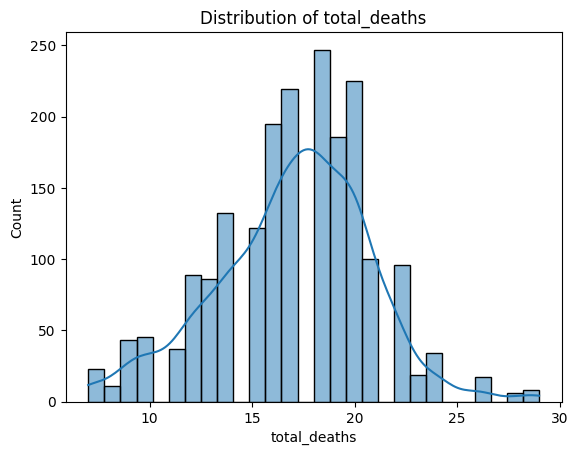

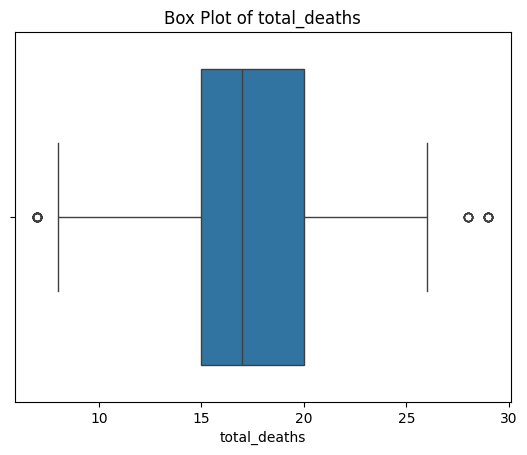

In [86]:
sns.histplot(df1['total_deaths'], kde=True)
plt.title('Distribution of total_deaths')
plt.show()

sns.boxplot(x='total_deaths', data=df1)
plt.title('Box Plot of total_deaths')
plt.show()

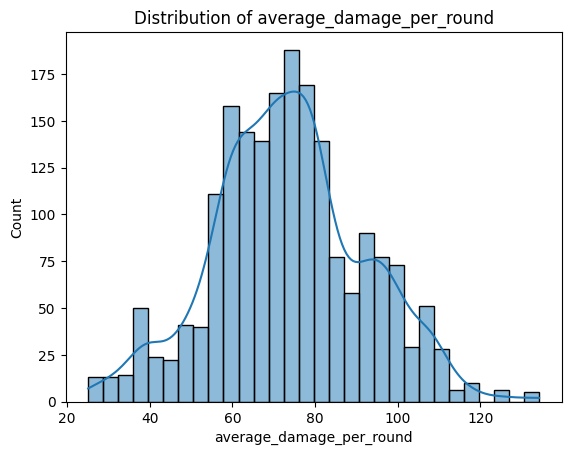

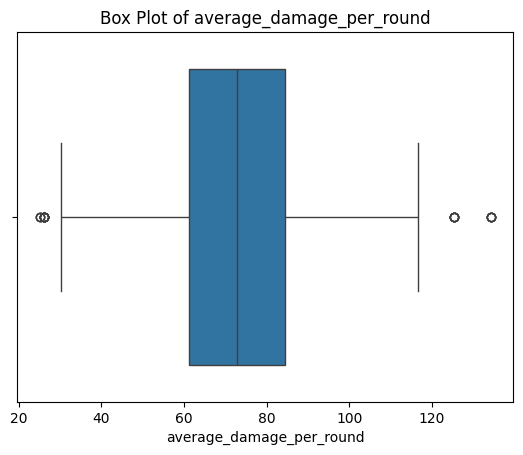

In [87]:
sns.histplot(df1['average_damage_per_round'], kde=True)
plt.title('Distribution of average_damage_per_round')
plt.show()

sns.boxplot(x='average_damage_per_round', data=df1)
plt.title('Box Plot of average_damage_per_round')
plt.show()

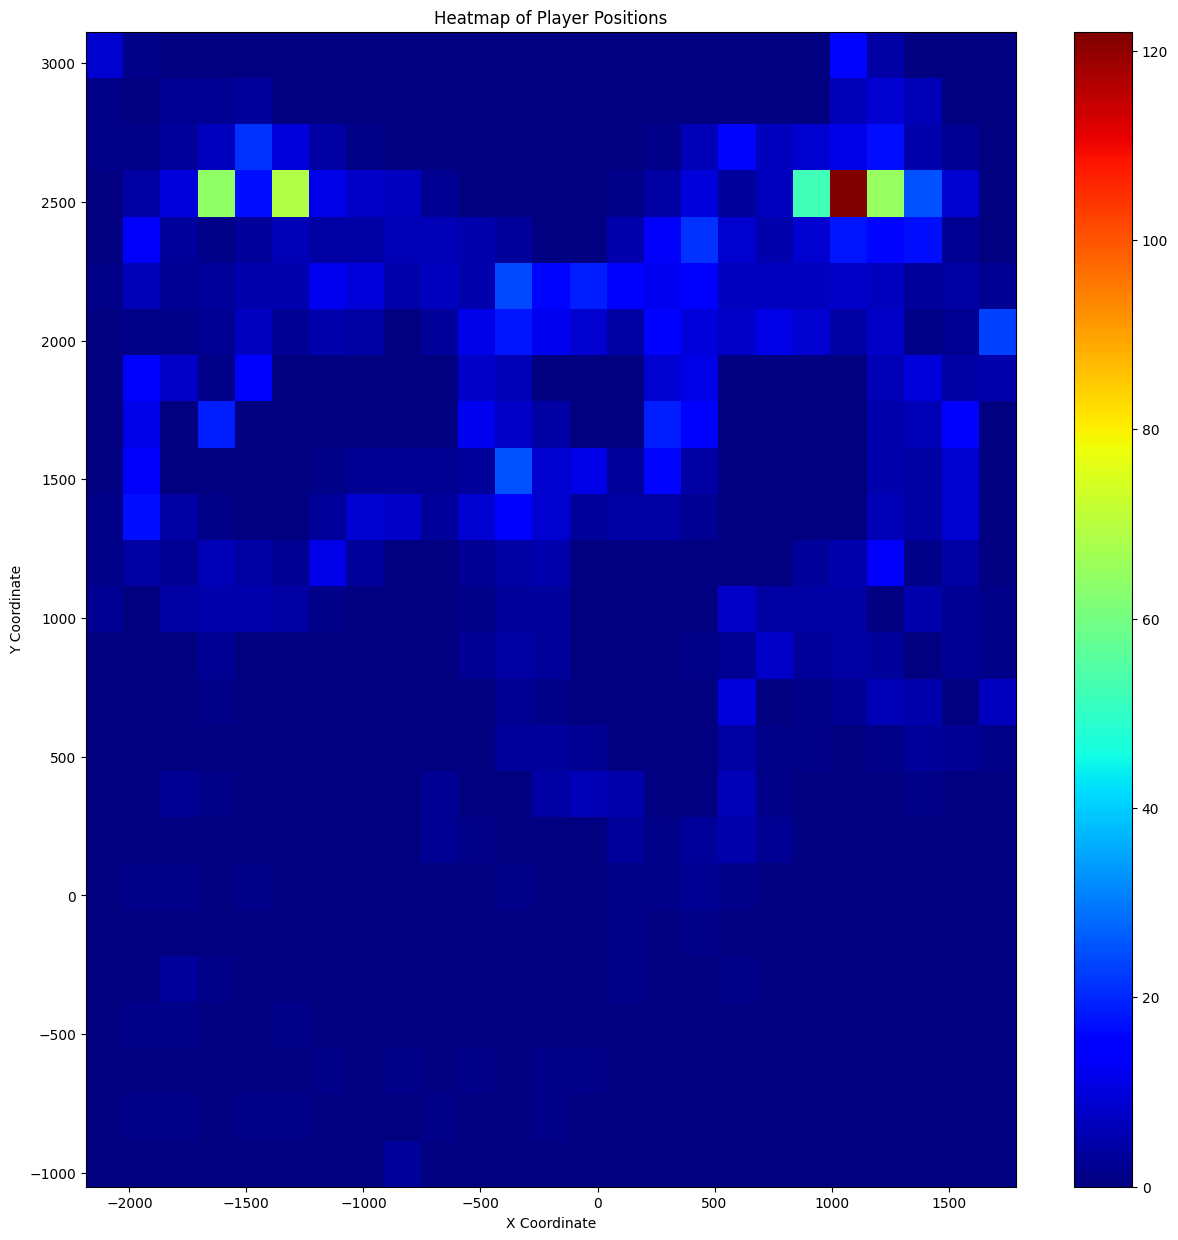

In [88]:
dfx = df1['lastKnownPosition'].apply(lambda x: x[0])
dfy = df1['lastKnownPosition'].apply(lambda x: x[1])

plt.figure(figsize=(15, 15))
plt.hist2d(dfx, dfy, bins=(25,25), cmap=plt.cm.jet)
plt.colorbar()
plt.title("Heatmap of Player Positions")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [89]:
print(df_jan_dead.head())

          playerName  equipment_value  cash  cash_spend_this_round  \
0       1WIN.2flamie             5000   300                   4800   
1  NemigaiDISBALANCE             7250  2350                   1100   
2        NemigaboXig             5900   850                   2800   
3          NemigaJy0             6000  1900                   1400   
4       NemigaChilll             5150   150                   3600   

   round_damage  total_kills  round_kills  \
0           100           18            1   
1             0           13            0   
2            96           11            0   
3             0           10            0   
4           103            8            0   

                                   lastKnownPosition    callout  \
0  [1308.2955322265625, 2773.153076171875, 118.23...      ARamp   
1  [1557.5618896484375, 1634.6453857421875, 1.023...      LongA   
2  [584.3765258789062, 2654.688720703125, 95.5439...  ExtendedA   
3  [-747.6292724609375, 2548.51611328125

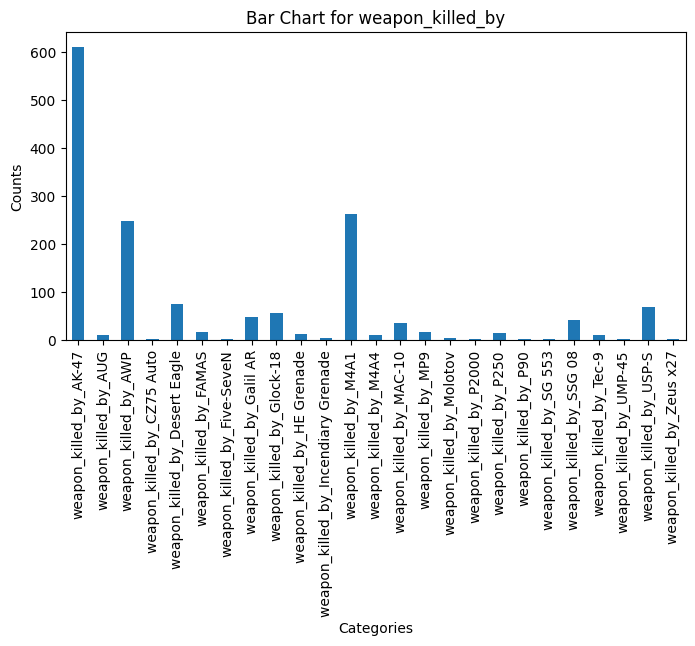

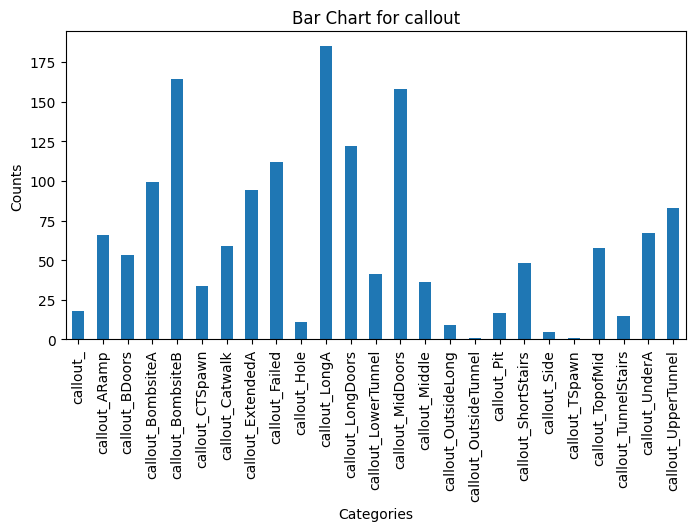

In [90]:
columns_to_encode = ['weapon_killed_by', 'callout']
# print(df1.columns)

encoded_dfs = {}

for column in columns_to_encode:
    encoded_df = pd.get_dummies(df_jan_dead[column], prefix=column)
    encoded_dfs[column] = encoded_df
    encoded_sum = encoded_df.sum()
    plt.figure(figsize=(8, 4))
    encoded_sum.plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.ylabel('Counts')
    plt.xlabel('Categories')
    plt.show()

In [91]:
df_jan_dead.describe()

,equipment_value,cash,cash_spend_this_round,round_damage,total_kills,round_kills,average_damage_per_round,time_of_death,amount_spent,total_deaths,hp
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1.556000e+03,1556.000000,1556.000000,1556.0
mean,4279.723650,2027.120823,2544.569409,54.683162,16.954370,0.364396,70.818544,2.265840e+05,35980.173522,18.021208,0.0
std,1984.218732,2403.819375,1957.238459,62.097076,6.063425,0.598168,18.020398,1.815738e+05,23373.400674,3.724802,0.0
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,25.083333,8.455000e+03,0.000000,7.000000,0.0
25%,2950.000000,250.000000,800.000000,0.000000,12.000000,0.000000,59.791667,1.111810e+05,15862.500000,16.000000,0.0
50%,4900.000000,1250.000000,2200.000000,33.000000,17.000000,0.000000,70.458333,2.049830e+05,35375.000000,18.000000,0.0
75%,5550.000000,2750.000000,4200.000000,100.000000,21.000000,1.000000,80.916667,2.864330e+05,51962.500000,20.000000,0.0
max,8250.000000,13650.000000,9550.000000,314.000000,36.000000,4.000000,134.210526,1.132331e+06,110350.000000,29.000000,0.0


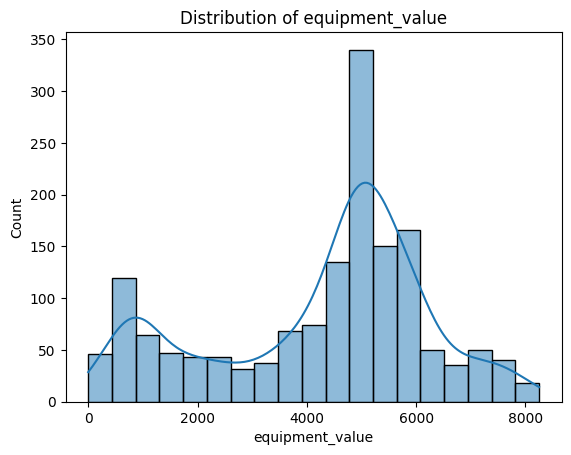

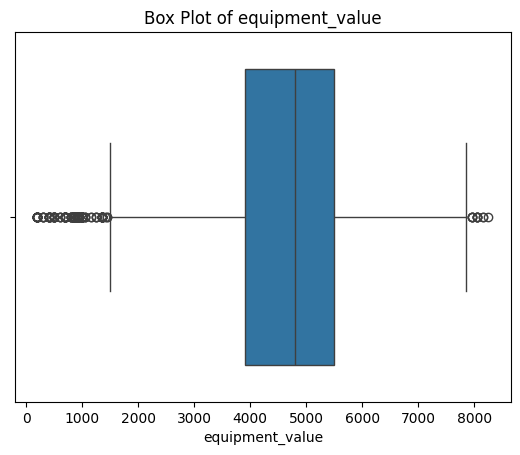

In [92]:
sns.histplot(df_jan_dead['equipment_value'], kde=True)
plt.title('Distribution of equipment_value')
plt.show()

# Box Plot
sns.boxplot(x='equipment_value', data=df1)
plt.title('Box Plot of equipment_value')
plt.show()

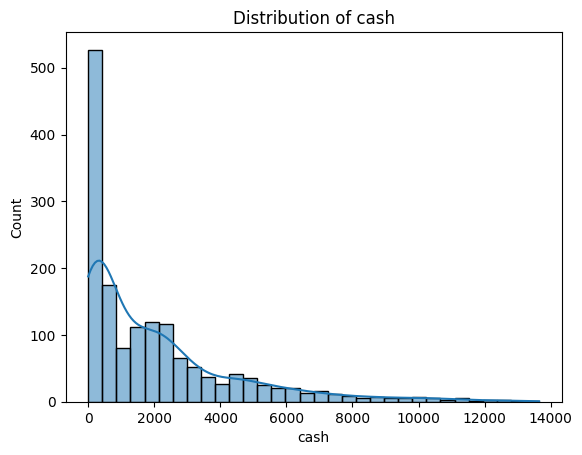

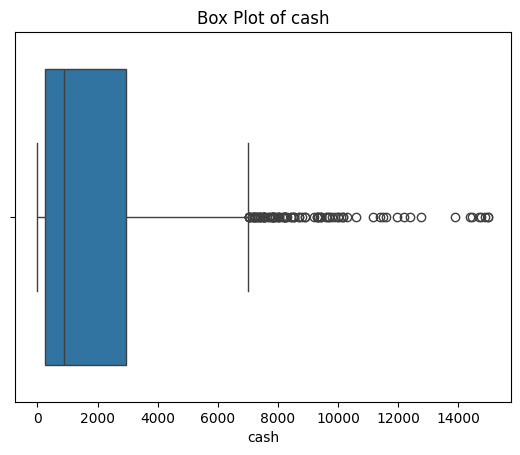

In [93]:
sns.histplot(df_jan_dead['cash'], kde=True)
plt.title('Distribution of cash')
plt.show()

# Box Plot
sns.boxplot(x='cash', data=df1)
plt.title('Box Plot of cash')
plt.show()

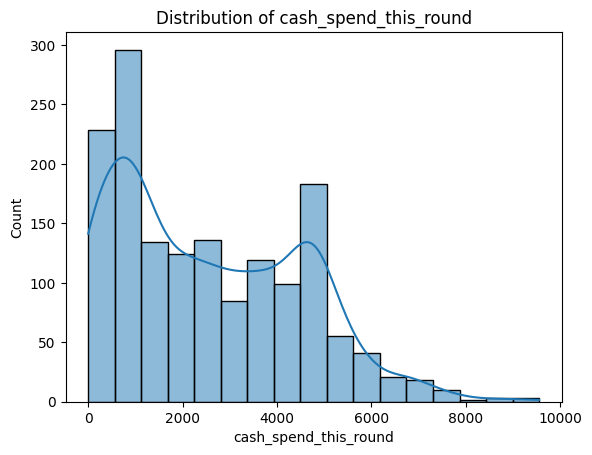

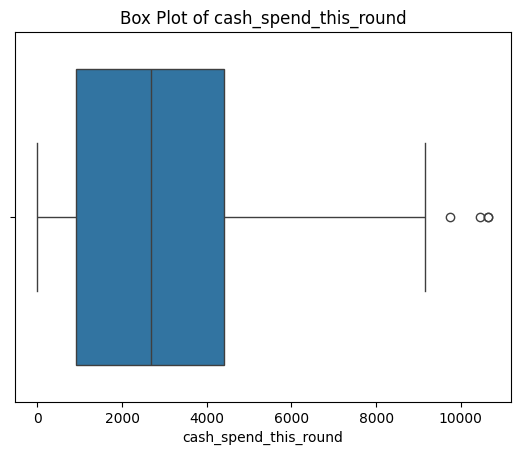

In [94]:
sns.histplot(df_jan_dead['cash_spend_this_round'], kde=True)
plt.title('Distribution of cash_spend_this_round')
plt.show()

# Box Plot
sns.boxplot(x='cash_spend_this_round', data=df1)
plt.title('Box Plot of cash_spend_this_round')
plt.show()

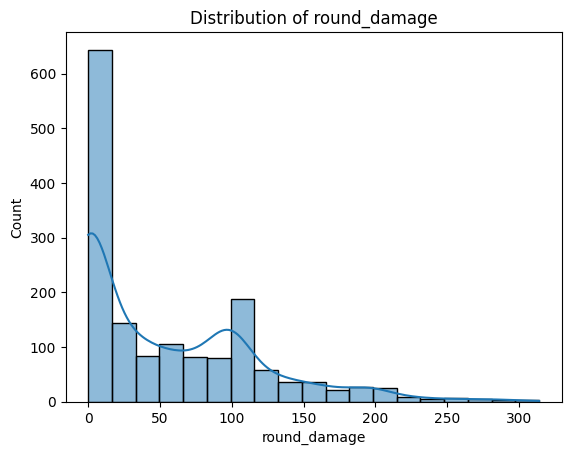

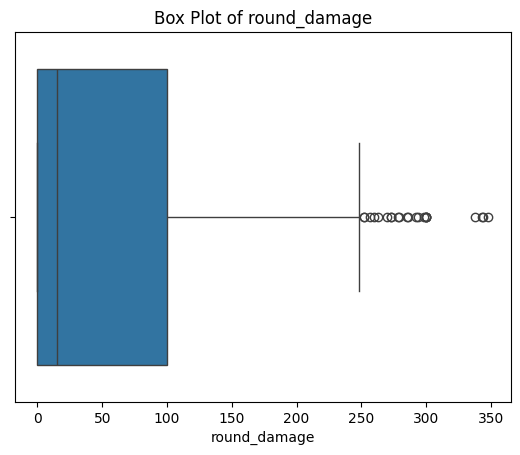

In [95]:
sns.histplot(df_jan_dead['round_damage'], kde=True)
plt.title('Distribution of round_damage')
plt.show()

# Box Plot
sns.boxplot(x='round_damage', data=df1)
plt.title('Box Plot of round_damage')
plt.show()

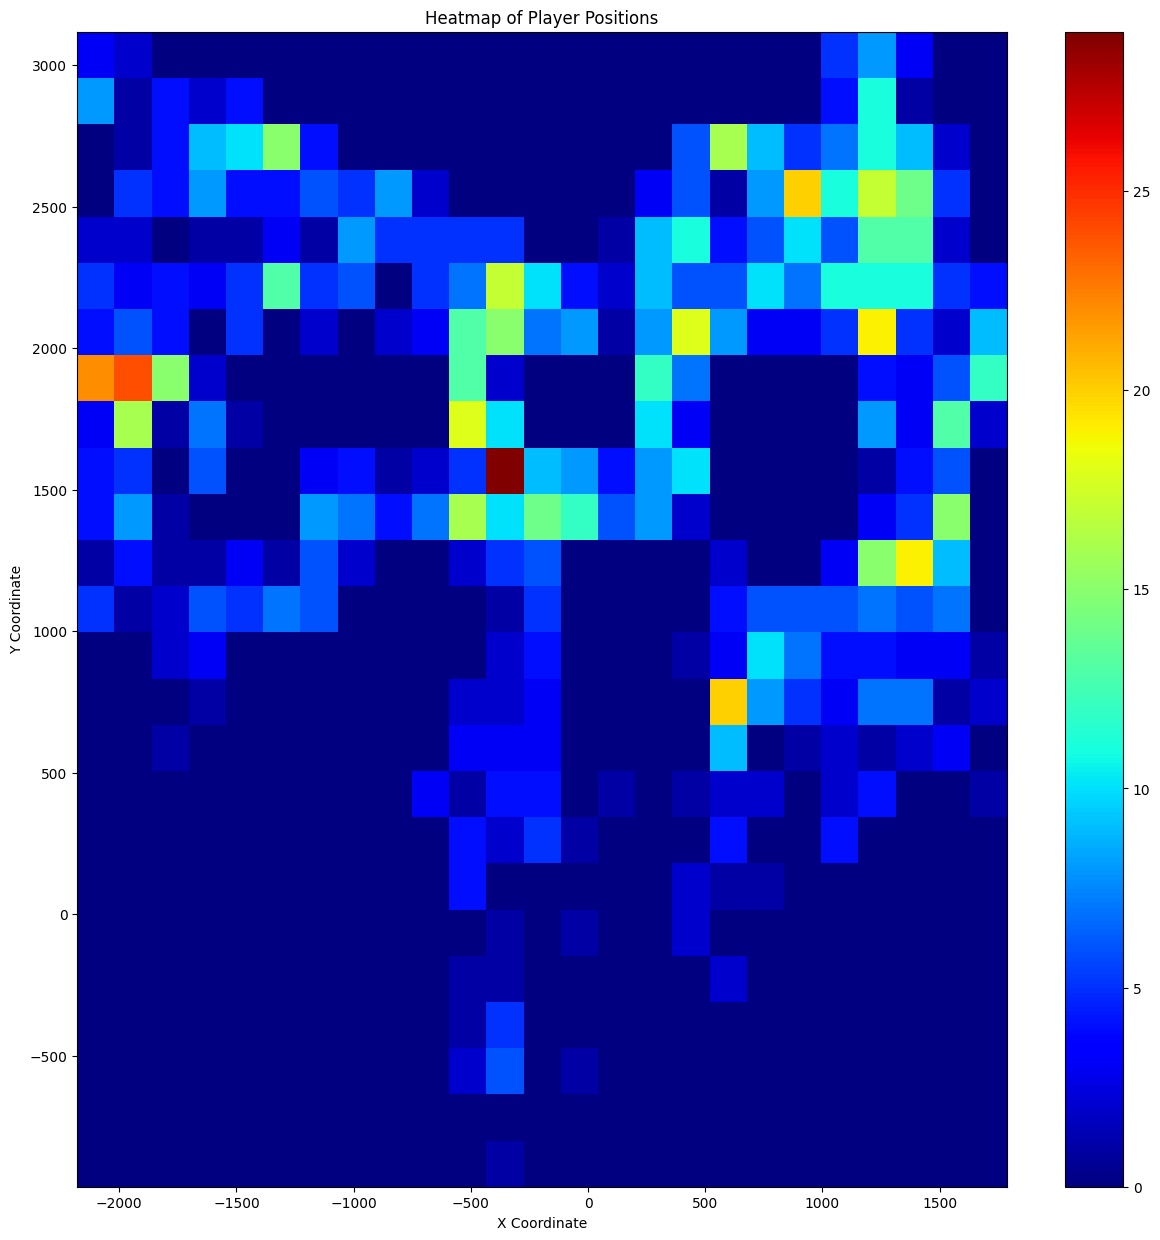

In [96]:
df2x = df_jan_dead['lastKnownPosition'].apply(lambda x: x[0])
df2y = df_jan_dead['lastKnownPosition'].apply(lambda x: x[1])

plt.figure(figsize=(15, 15))
plt.hist2d(df2x, df2y, bins=(25,25), cmap=plt.cm.jet)
plt.colorbar()
plt.title("Heatmap of Player Positions")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

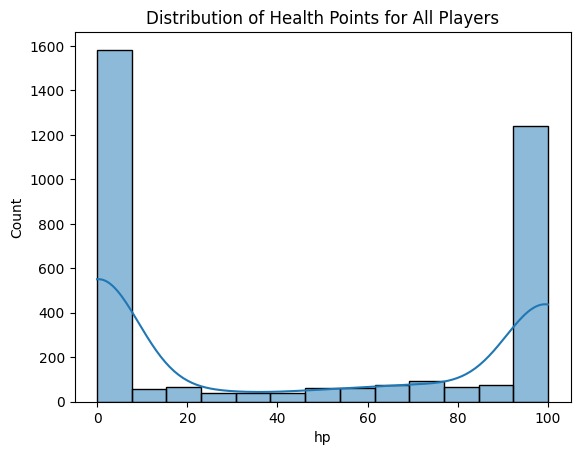

In [98]:
sns.histplot(df_jan['hp'], kde=True)
plt.title('Distribution of Health Points for All Players')
plt.show()

# sns.boxplot(x='hp', data=df1)
# plt.title('Box Plot of Health Points')
# plt.show()